In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for training and testing datasets
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Image Data Generator with data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image Data Generator for test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the directories and create batches for training and testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification (chihuahua vs muffin)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


2024-09-08 11:01:27.455077: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-08 11:01:27.484898: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-08 11:01:27.485801: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-08 11:01:28.138199: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [2]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential()

# Add Convolutional and Pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Add Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [3]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
147/147 [==============================] - 67s 454ms/step - loss: 0.5990 - accuracy: 0.6643 - val_loss: 0.5252 - val_accuracy: 0.7534
Epoch 2/10
147/147 [==============================] - 75s 513ms/step - loss: 0.4536 - accuracy: 0.7992 - val_loss: 0.3526 - val_accuracy: 0.8649
Epoch 3/10
147/147 [==============================] - 72s 487ms/step - loss: 0.4008 - accuracy: 0.8271 - val_loss: 0.3112 - val_accuracy: 0.8725
Epoch 4/10
147/147 [==============================] - 67s 453ms/step - loss: 0.3490 - accuracy: 0.8524 - val_loss: 0.4004 - val_accuracy: 0.8066
Epoch 5/10
147/147 [==============================] - 67s 454ms/step - loss: 0.3249 - accuracy: 0.8670 - val_loss: 0.3075 - val_accuracy: 0.8590
Epoch 6/10
147/147 [==============================] - 67s 454ms/step - loss: 0.3116 - accuracy: 0.8709 - val_loss: 0.2460 - val_accuracy: 0.9054
Epoch 7/10
147/147 [==============================] - 67s 453ms/step - loss: 0.3090 - accuracy: 0.8724 - val_loss: 0.2937 - val_ac

37/37 [==============================] - 6s 161ms/step - loss: 0.2463 - accuracy: 0.9046
Test accuracy: 0.9045608043670654


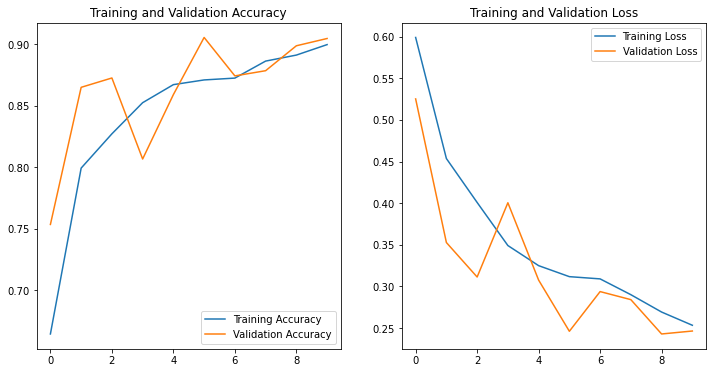

In [4]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy/loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

1/1 [==============================] - 0s 22ms/step


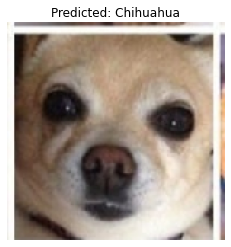

1/1 [==============================] - 0s 18ms/step


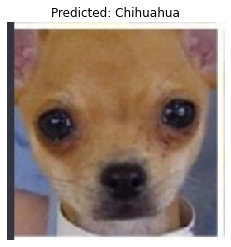

1/1 [==============================] - 0s 18ms/step


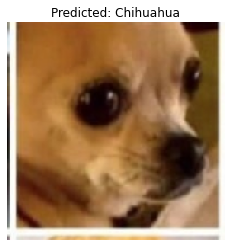

1/1 [==============================] - 0s 16ms/step


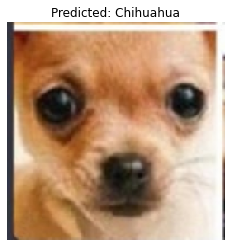

1/1 [==============================] - 0s 26ms/step


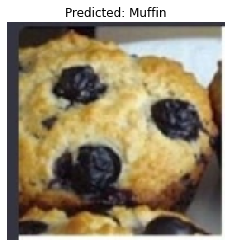

1/1 [==============================] - 0s 18ms/step


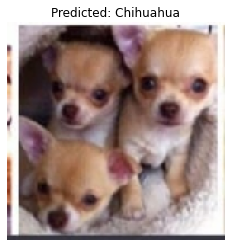

1/1 [==============================] - 0s 21ms/step


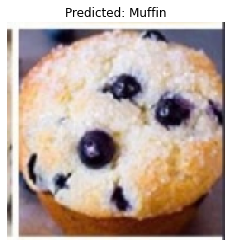

1/1 [==============================] - 0s 20ms/step


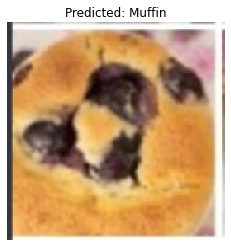

1/1 [==============================] - 0s 16ms/step


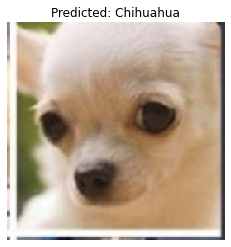

1/1 [==============================] - 0s 17ms/step


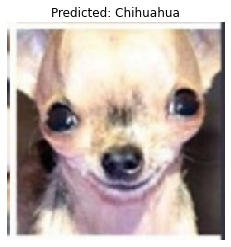

1/1 [==============================] - 0s 16ms/step


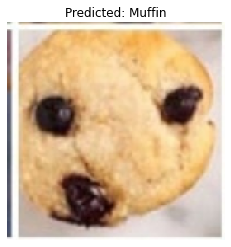

1/1 [==============================] - 0s 20ms/step


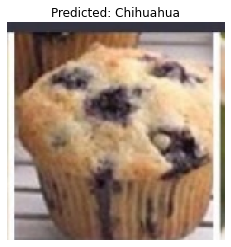

1/1 [==============================] - 0s 17ms/step


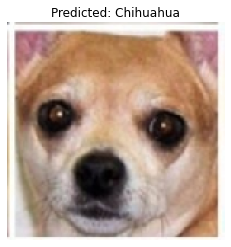

1/1 [==============================] - 0s 18ms/step


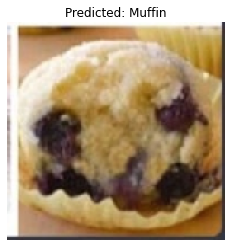

1/1 [==============================] - 0s 17ms/step


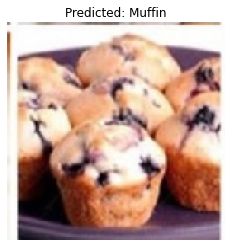

1/1 [==============================] - 0s 18ms/step


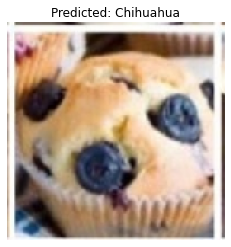

<Figure size 432x288 with 0 Axes>

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import display  # To display images in Jupyter Notebook

# Path to the folder where the prediction images are stored
predict_folder = 'dataset/predict'

# Function to load and preprocess images, make predictions, and display them
def predict_and_show_images(model, folder_path):
    class_names = ['Chihuahua', 'Muffin']  # Assuming 0 = Chihuahua, 1 = Muffin

    # Iterate through each image file in the predict directory
    for img_file in os.listdir(folder_path):
        # Only process .jpg files
        if img_file.endswith('.jpg'):
            img_path = os.path.join(folder_path, img_file)

            # Load and preprocess the image
            img = load_img(img_path, target_size=(150, 150))  # Resize image to (150, 150)
            img_array = img_to_array(img)  # Convert image to array
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array /= 255.  # Normalize pixel values

            # Make prediction
            prediction = model.predict(img_array)

            # Get the predicted class (0 = Chihuahua, 1 = Muffin)
            predicted_class = int(prediction[0] > 0.5)

            # Display the image with its predicted label
            plt.imshow(img)
            plt.title(f'Predicted: {class_names[predicted_class]}')
            plt.axis('off')  # Turn off axis labels
            display(plt.gcf())  # Display the current figure in Jupyter Notebook
            plt.clf()  # Clear the figure for the next image

# Call the function to predict and show images from the predict folder
predict_and_show_images(model, predict_folder)


In [15]:
# Save the entire model to a file
model.save('my_model.h5')


/home/rashmi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
